<a href="https://colab.research.google.com/github/aizatrosli/MANB1123/blob/master/FASA/hurricane/prediction_raw/Prediction_NOAA_GHCND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/aizatrosli/MANB1123/master/FASA/hurricane/prediction_raw/Houston_GHCND.csv

--2019-10-11 13:22:44--  https://raw.githubusercontent.com/aizatrosli/MANB1123/master/FASA/hurricane/prediction_raw/Houston_GHCND.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1176668 (1.1M) [text/plain]
Saving to: ‘Houston_GHCND.csv.1’

Houston_GHCND.csv.1 100%[===================>]   1.12M  --.-KB/s    in 0.04s   

2019-10-11 13:22:44 (25.4 MB/s) - ‘Houston_GHCND.csv.1’ saved [1176668/1176668]



In [0]:
import pandas as pd
rawdf = pd.read_csv('Houston_GHCND.csv', low_memory=False)
rawdf['date'] = pd.to_datetime(rawdf['date'])

In [3]:
wtcol = [col for col in rawdf.columns.tolist() if "WT" in col]
rawdf[wtcol]=rawdf[wtcol].fillna(value=0.0)
pd.isna(rawdf).any()

index            False
AWND              True
DAPR              True
MDPR              True
PGTM              True
PRCP              True
SNOW              True
SNWD              True
TAVG              True
TMAX              True
TMIN              True
TOBS              True
WDF2              True
WDF5              True
WSF2              True
WSF5              True
WT01             False
WT02             False
WT03             False
WT04             False
WT05             False
WT06             False
WT08             False
WT10             False
datacoverage     False
date             False
elevation        False
elevationUnit    False
latitude         False
longitude        False
maxdate          False
mindate          False
name             False
station          False
dtype: bool

In [4]:
from sklearn.impute import SimpleImputer
impcol = [col for col in rawdf.describe().columns.tolist()]
imp_median = SimpleImputer(strategy='median')
rawdf[impcol]=pd.DataFrame(imp_median.fit_transform(rawdf[impcol]),columns=impcol)
#remove unwanted data and columns
rawdf = rawdf.drop(['DAPR','MDPR','TOBS','datacoverage'],axis=1)
rawdf = rawdf[rawdf['name'] != "BAYTOWN, TX US"]
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5145 entries, 1 to 6093
Data columns (total 30 columns):
index            5145 non-null float64
AWND             5145 non-null float64
PGTM             5145 non-null float64
PRCP             5145 non-null float64
SNOW             5145 non-null float64
SNWD             5145 non-null float64
TAVG             5145 non-null float64
TMAX             5145 non-null float64
TMIN             5145 non-null float64
WDF2             5145 non-null float64
WDF5             5145 non-null float64
WSF2             5145 non-null float64
WSF5             5145 non-null float64
WT01             5145 non-null float64
WT02             5145 non-null float64
WT03             5145 non-null float64
WT04             5145 non-null float64
WT05             5145 non-null float64
WT06             5145 non-null float64
WT08             5145 non-null float64
WT10             5145 non-null float64
date             5145 non-null datetime64[ns]
elevation        5145 non-nu

In [5]:
rawdf.head()

,index,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT10,date,elevation,elevationUnit,latitude,longitude,maxdate,mindate,name,station
1,0.0,25.0,1248.0,0.0,0.0,0.0,111.0,189.0,22.0,100.0,90.0,76.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-01,29.0,METERS,29.98000,-95.36000,2019-09-25,1969-06-01,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",GHCND:USW00012960
2,0.0,26.0,1248.0,0.0,0.0,0.0,233.0,194.0,61.0,80.0,90.0,89.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-01,13.4,METERS,29.51889,-95.24167,2019-09-25,1997-06-01,"HOUSTON CLOVER FIELD, TX US",GHCND:USW00012975
3,0.0,15.0,1248.0,0.0,0.0,0.0,233.0,189.0,22.0,100.0,110.0,72.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-01,46.3,METERS,30.06750,-95.55611,2019-09-25,1998-01-01,"HOUSTON HOOKS MEMORIAL AIRPORT, TX US",GHCND:USW00053910
4,0.0,27.0,1248.0,0.0,0.0,0.0,233.0,189.0,39.0,140.0,140.0,72.0,89.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-01,25.6,METERS,29.62194,-95.65667,2019-09-25,2000-12-01,"HOUSTON SUGARLAND MEM, TX US",GHCND:USW00012977
5,0.0,25.0,1248.0,0.0,0.0,0.0,129.0,189.0,72.0,60.0,80.0,76.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-01,13.4,METERS,29.63806,-95.28194,2019-09-25,1930-08-01,"HOUSTON WILLIAM P HOBBY AIRPORT, TX US",GHCND:USW00012918


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [7]:
rawdf['name'].unique().tolist()
loc1df = rawdf[rawdf['name']==rawdf['name'].unique().tolist()[1]]
loc1df.describe(include="all")

,index,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT10,date,elevation,elevationUnit,latitude,longitude,maxdate,mindate,name,station
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.0,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.0,1029.0,1029.000000,1029.0,1029,1.029000e+03,1029,1.029000e+03,1.029000e+03,1029,1029,1029,1029
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1029,NaN,1,NaN,NaN,1,1,1,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-30 00:00:00,NaN,METERS,NaN,NaN,2019-09-25,1997-06-01,"HOUSTON CLOVER FIELD, TX US",GHCND:USW00012975
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1029,NaN,NaN,1029,1029,1029,1029
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,514.000000,30.520894,1243.344995,43.304179,0.036929,0.0,233.0,271.538387,175.949466,161.344995,158.874636,77.303207,104.108844,0.471331,0.052478,0.227405,0.001944,0.0,0.0,0.192420,0.0,NaN,1.340000e+01,NaN,2.951889e+01,-9.524167e+01,NaN,NaN,NaN,NaN
std,297.191016,13.507413,110.974339,173.254350,1.184611,0.0,0.0,69.407608,74.671494,91.794446,89.877245,19.256749,27.093903,0.499420,0.223098,0.419360,0.044065,0.0,0.0,0.394393,0.0,NaN,2.363703e-13,NaN,4.300874e-13,1.905181e-12,NaN,NaN,NaN,NaN
min,0.000000,5.000000,41.000000,0.000000,0.000000,0.0,233.0,11.000000,-66.000000,10.000000,10.000000,31.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,NaN,1.340000e+01,NaN,2.951889e+01,-9.524167e+01,NaN,NaN,NaN,NaN
25%,257.000000,20.000000,1248.000000,0.000000,0.000000,0.0,233.0,228.000000,117.000000,110.000000,110.000000,63.000000,85.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,NaN,1.340000e+01,NaN,2.951889e+01,-9.524167e+01,NaN,NaN,NaN,NaN


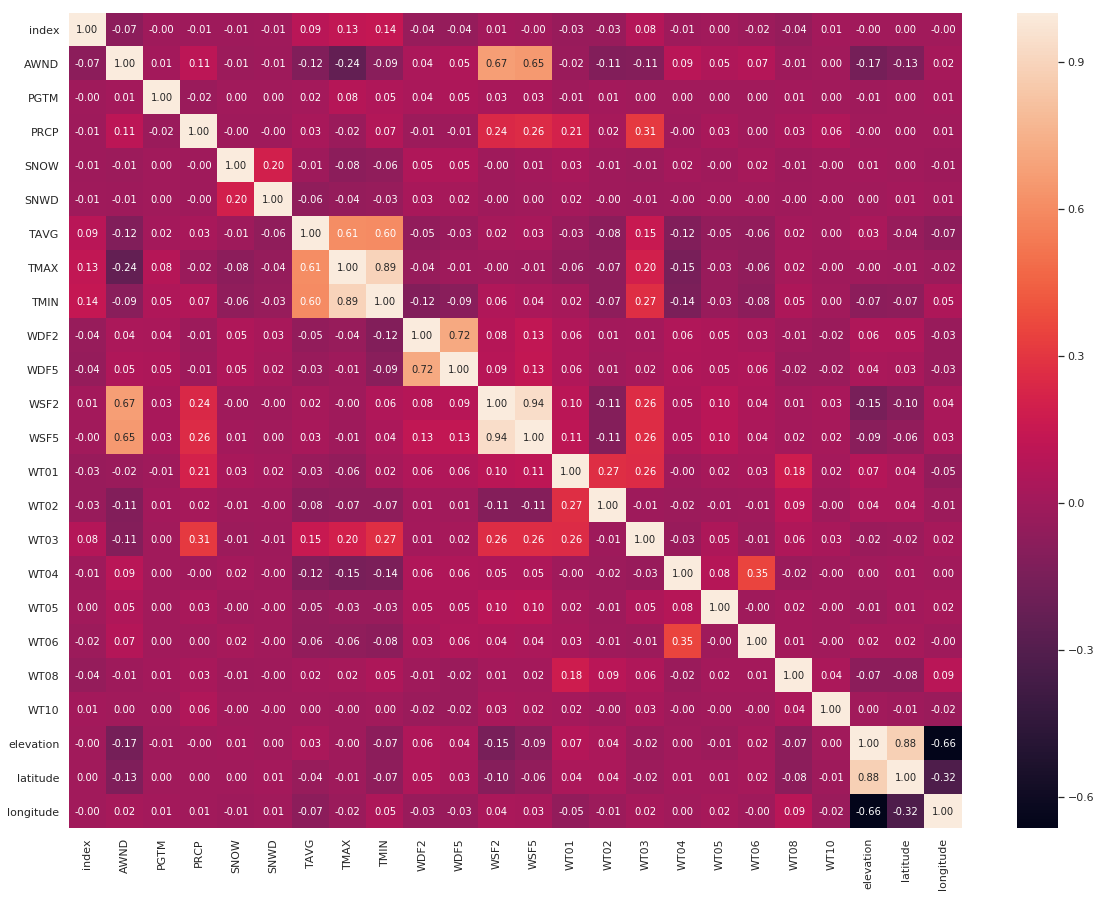

In [8]:
#pearson correlation
plt.figure(figsize=(20, 15))
sns.heatmap(rawdf.corr(), annot=True, fmt=".2f")

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


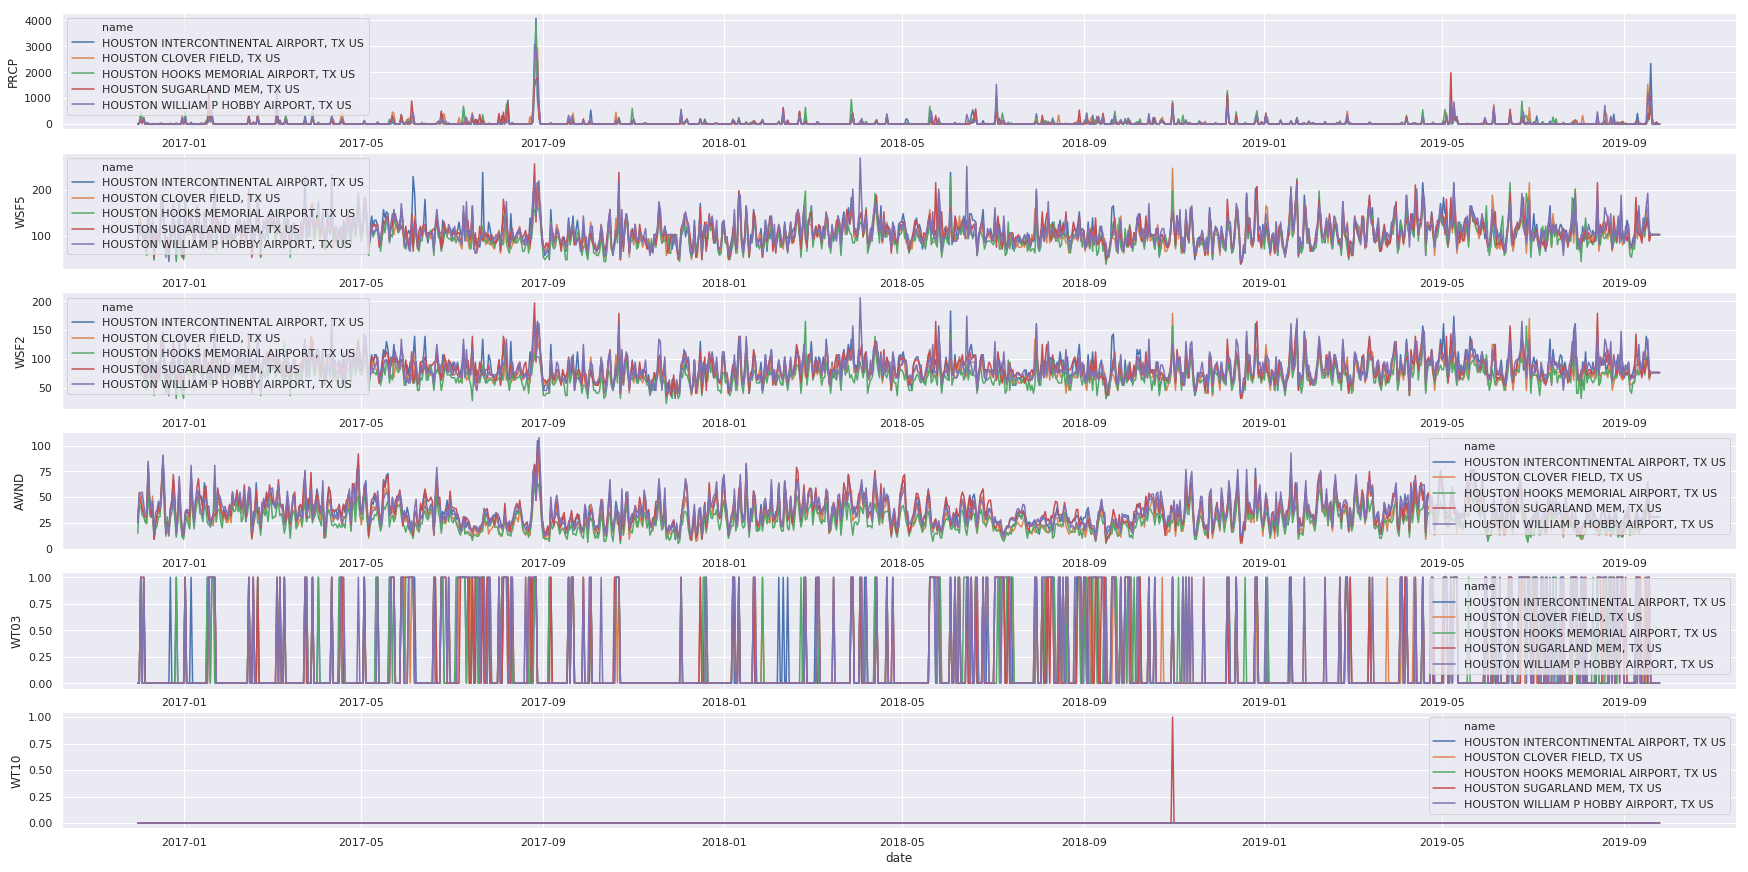

In [9]:
#Analyzing Wind speed for Harvey
corrarr =  ['PRCP','WSF5', 'WSF2', 'AWND','WT03', 'WT10']
fig, ax = plt.subplots(len(corrarr), 1, figsize=(30, 15))
for var, subplot in zip(corrarr, ax.flatten()):
    sns.lineplot(x="date", y=var, hue="name", data=rawdf, ax=subplot)

In [10]:
doecol=loc1df.describe().columns.tolist()
print('\n'.join(['{0} : {1}'.format(col,loc1df[col].unique().tolist()) for col in doecol if not pd.isna(loc1df[col].unique().tolist()).all()]))
doecol=[col for col in doecol if not pd.isna(loc1df[col].unique().tolist()).all()]

index : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 15

In [0]:
raw1ydf = rawdf[(rawdf['date'] > '2017-01-01') & (rawdf['date'] < '2018-01-01')]
raw1mdf = rawdf[(rawdf['date'] > '2017-08-01') & (rawdf['date'] < '2018-09-01')]

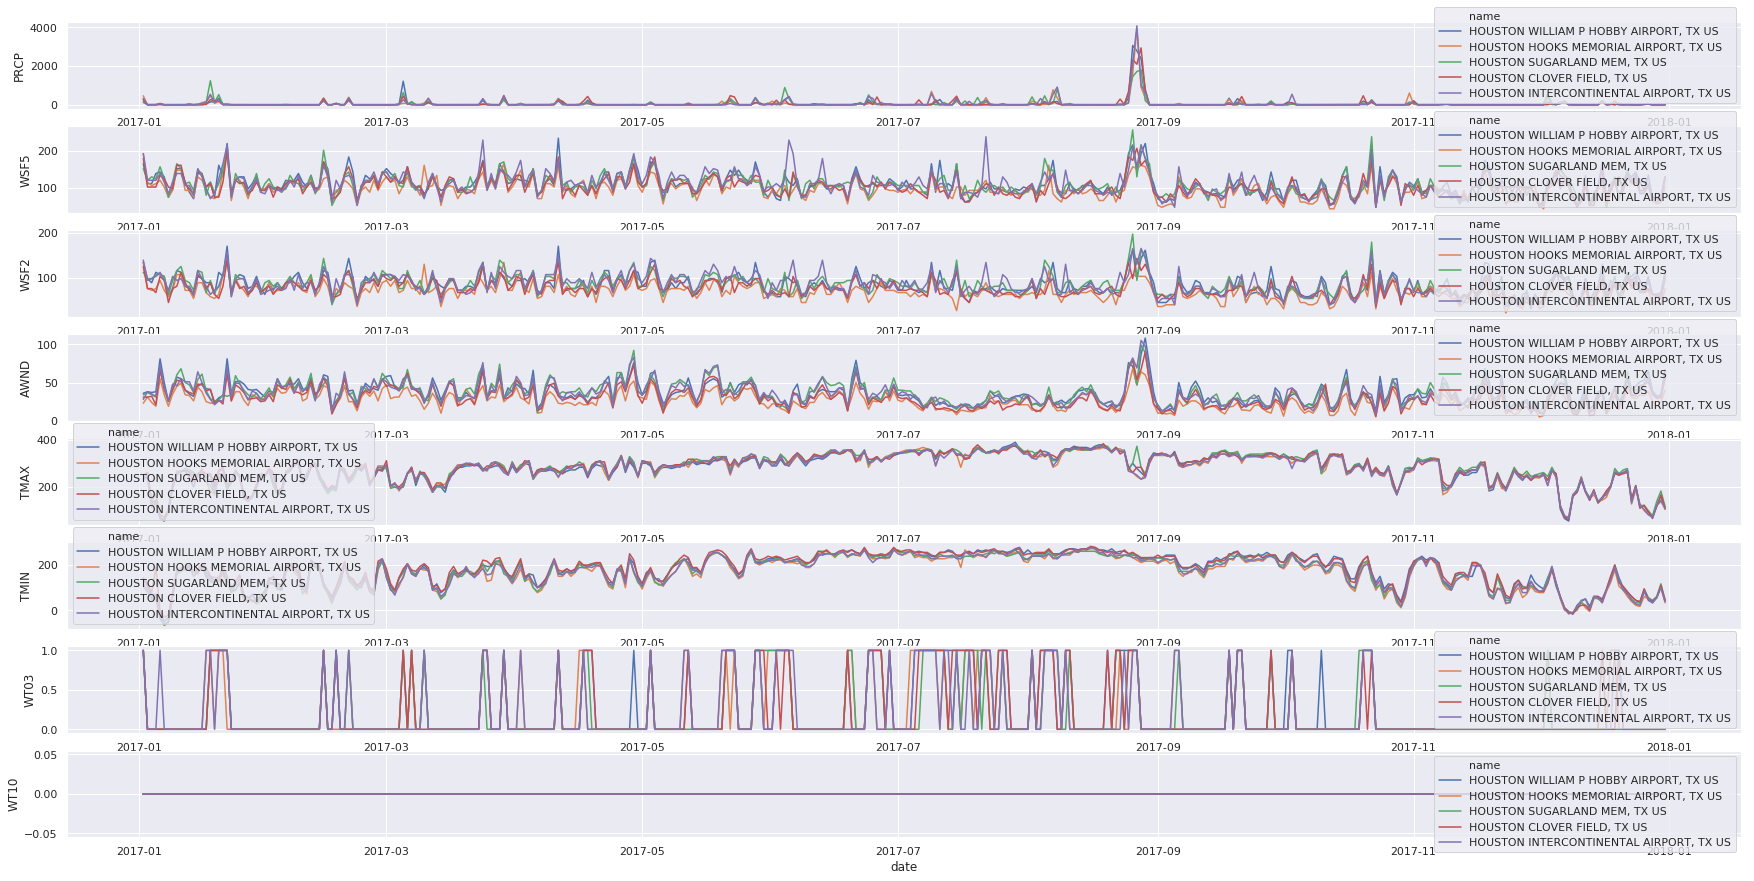

In [12]:
#Analyzing Wind speed for Harvey
corrarr =  ['PRCP','WSF5', 'WSF2', 'AWND','TMAX','TMIN','WT03', 'WT10']
fig, ax = plt.subplots(len(corrarr), 1, figsize=(30, 15))
for var, subplot in zip(corrarr, ax.flatten()):
    sns.lineplot(x="date", y=var, hue="name", data=raw1ydf, ax=subplot)


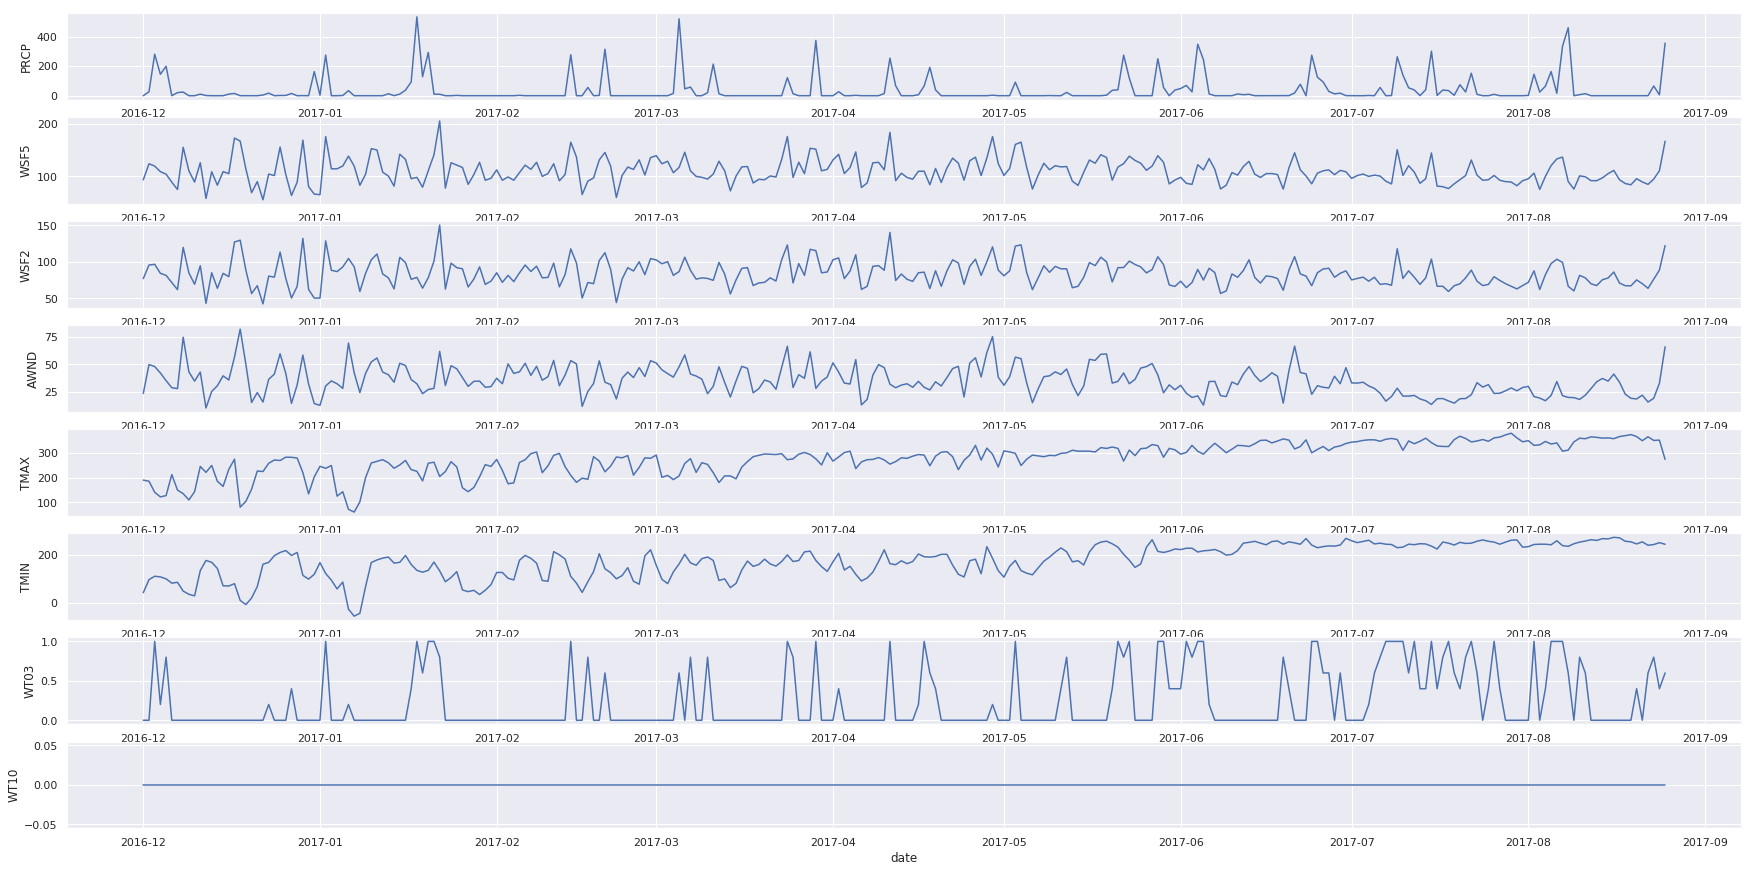

In [13]:
#A
mediandf=rawdf.groupby('date',as_index=False).mean()
corrarr =  ['PRCP','WSF5', 'WSF2', 'AWND','TMAX','TMIN','WT03', 'WT10']
fig, ax = plt.subplots(len(corrarr), 1, figsize=(30, 15))
for var, subplot in zip(corrarr, ax.flatten()):
    sns.lineplot(x="date", y=var, data=mediandf[(mediandf['date'] < '2017-08-26')], ax=subplot)

In [0]:
predcol = ['WSF5', 'WSF2', 'AWND']
train = mediandf[(mediandf['date'] < '2017-08-26')][predcol]
valid = mediandf[(mediandf['date'] > '2017-08-27')]
#valid=valid[predcol]

In [15]:
#train using vector autoregression
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(endog=train)
model_fit = model.fit()
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 11, Oct, 2019
Time:                     13:23:03
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    12.9239
Nobs:                     267.000    HQIC:                   12.8274
Log likelihood:          -2828.39    FPE:                    348945.
AIC:                      12.7627    Det(Omega_mle):         333721.
--------------------------------------------------------------------
Results for equation WSF5
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          89.832347         7.488715           11.996           0.000
L1.WSF5         0.022242         0.335534            0.066           0.947
L1.WSF2         0.099298         0.468430            0.212           0.832
L1.AWND   

In [16]:
prediction = model_fit.forecast(model_fit.y, steps=len(valid))
pred = pd.DataFrame(index=valid['date'],columns=[col for col in predcol])
for j in range(0,3):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = float(prediction[i][j])
valid=valid[predcol+['date']]
valid.loc[:,'datatype'] = 'historical'
pred.loc[:,'datatype'] = 'predict'
pred['date'] = pred.index
comparedf = pd.concat([valid,pred],ignore_index=True)
comparedf

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


,AWND,WSF2,WSF5,datatype,date
0,84.4,137.6,188.8,historical,2017-08-28
1,88.8,137,181.6,historical,2017-08-29
2,57.2,104.4,144.8,historical,2017-08-30
3,28,72.4,95.4,historical,2017-08-31
4,16.6,48.6,71.8,historical,2017-09-01
5,11.4,52.2,64.4,historical,2017-09-02
6,13.6,50.2,66.4,historical,2017-09-03
7,16.4,54.8,72.6,historical,2017-09-04
8,11.4,52,65.4,historical,2017-09-05
9,39.4,101.8,128,historical,2017-09-06


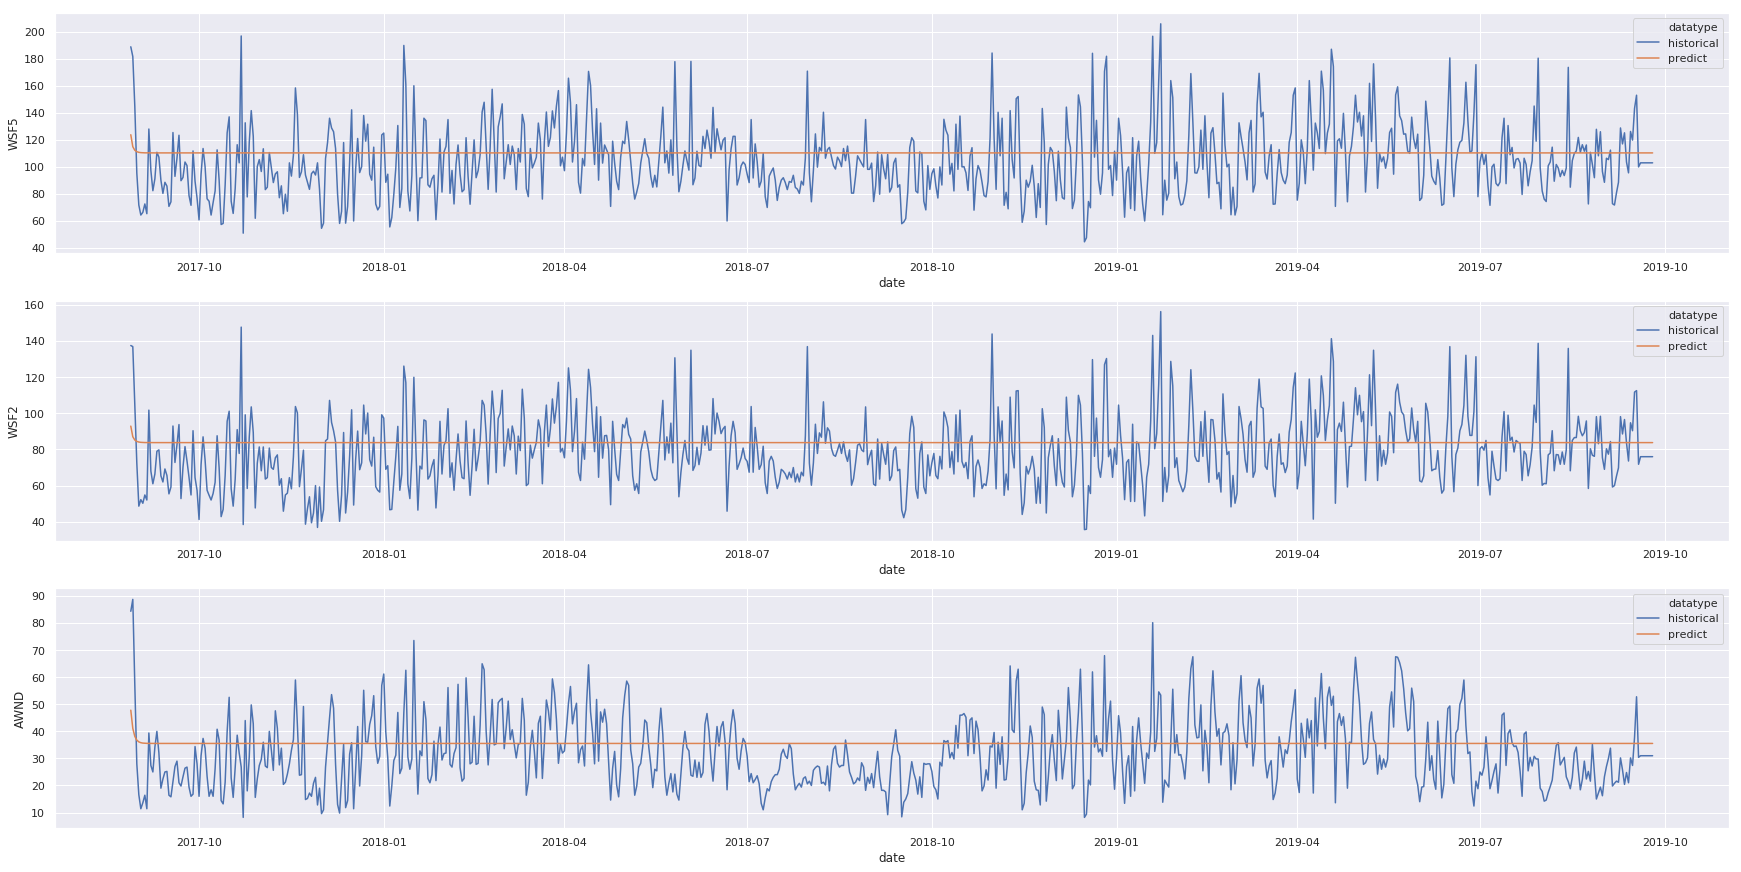

In [17]:
for col in predcol:
  comparedf[col] = comparedf[col].astype('float')
fig, ax = plt.subplots(len(predcol), 1, figsize=(30, 15))
for var, subplot in zip(predcol, ax.flatten()):
    sns.lineplot(x="date", y=var, data=comparedf, hue="datatype", ax=subplot)

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#check rmse
for i in prepdf.columns.tolist():
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

NameError: ignored

In [0]:
model = VAR(endog=prepdf)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
yhat